## Data Transformation and Feature Engineering

1. Data Transformation: Feature Scaling
2. Categorical Data Encoding and Feature Engineering
3. Outlier Detection and Treatment
4. Data Aggregation and Merging

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data\Housing.csv')

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\HP\AppData\Local\Temp\ipykernel_1272\4223663724.py:1: SyntaxWarning: invalid escape sequence '\H'
  df = pd.read_csv('Data\Housing.csv')


price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Observations
- Numerical Features: `price`, `area`, `bedrooms`, `bathrooms`, `stories`, `parking`
- Categorical Features: `mainroad`, `guestroom`, `basement`, `prefarea`,`furnishingstatus`
- No missing values

### Data Transformation: Feature Scaling

#### Min-Max Scaling
Rescales features to a fixed range (usually 0 to 1).

In [5]:
from sklearn.preprocessing import MinMaxScaler
num_features = ['price', 'area', 'bedrooms', 'stories','parking']
scaler = MinMaxScaler()
df[num_features]= scaler.fit_transform(df[num_features])
df.head()

price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  1.000000  0.396564       0.6          2  0.666667      yes        no   
1  0.909091  0.502405       0.6          4  1.000000      yes        no   
2  0.909091  0.571134       0.4          2  0.333333      yes        no   
3  0.906061  0.402062       0.6          2  0.333333      yes        no   
4  0.836364  0.396564       0.6          1  0.333333      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea furnishingstatus  
0       no              no             yes  0.666667      yes        furnished  
1       no              no             yes  1.000000       no        furnished  
2      yes              no              no  0.666667      yes   semi-furnished  
3      yes              no             yes  1.000000      yes        furnished  
4      yes              no             yes  0.666667       no        furnished

#### Standardization

Rescales data to have a mean of 0 and a standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler
num_features = ['price', 'area', 'bedrooms','bathrooms', 'stories','parking']
scaler = StandardScaler()
df[num_features]=scaler.fit_transform(df[num_features])
df.head()

price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  4.566365  1.046726  1.403419   1.421812  1.378217      yes        no   
1  4.004484  1.757010  1.403419   5.405809  2.532024      yes        no   
2  4.004484  2.218232  0.047278   1.421812  0.224410      yes        no   
3  3.985755  1.083624  1.403419   1.421812  0.224410      yes        no   
4  3.554979  1.046726  1.403419  -0.570187  0.224410      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea furnishingstatus  
0       no              no             yes  1.517692      yes        furnished  
1       no              no             yes  2.679409       no        furnished  
2      yes              no              no  1.517692      yes   semi-furnished  
3      yes              no             yes  2.679409      yes        furnished  
4      yes              no             yes  1.517692       no        furnished

### Categorical Data Encoding and Feature Engineering

Converting non-numeric data into numerical formats:
- One-Hot Encoding: Creates binary columns for each category.
- Label Encoding: Assigns each category a unique number (good for ordinal data).


In [7]:
from sklearn.preprocessing import LabelEncoder
cat_features =  ["mainroad", "guestroom", "basement", "hotwaterheating", 
                "airconditioning", "prefarea", "furnishingstatus"]
encoder = LabelEncoder()
for col in cat_features:
    df[col]=encoder.fit_transform(df[col])
df.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  4.566365  1.046726  1.403419   1.421812  1.378217         1          0   
1  4.004484  1.757010  1.403419   5.405809  2.532024         1          0   
2  4.004484  2.218232  0.047278   1.421812  0.224410         1          0   
3  3.985755  1.083624  1.403419   1.421812  0.224410         1          0   
4  3.554979  1.046726  1.403419  -0.570187  0.224410         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  1.517692         1   
1         0                0                1  2.679409         0   
2         1                0                0  1.517692         1   
3         1                0                1  2.679409         1   
4         1                0                1  1.517692         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    float64
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 55.5 KB


### Outlier Detection & Treatment

In [9]:

from scipy import stats
import numpy as np


z_scores = stats.zscore(df[num_features].dropna())
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis =1)
house_df_no_outliers = df[filtered_entries]

print(f"Original data points: {len(df)}; After outlier removal: {len(house_df_no_outliers)}")


Original data points: 545; After outlier removal: 522


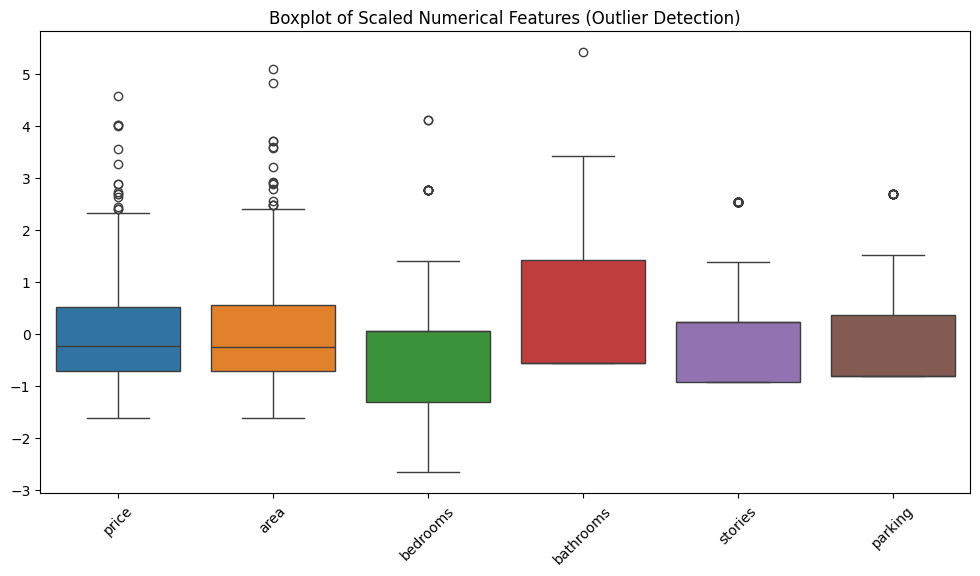

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot of Scaled Numerical Features (Outlier Detection)")
plt.show()

#### Outlier treatment

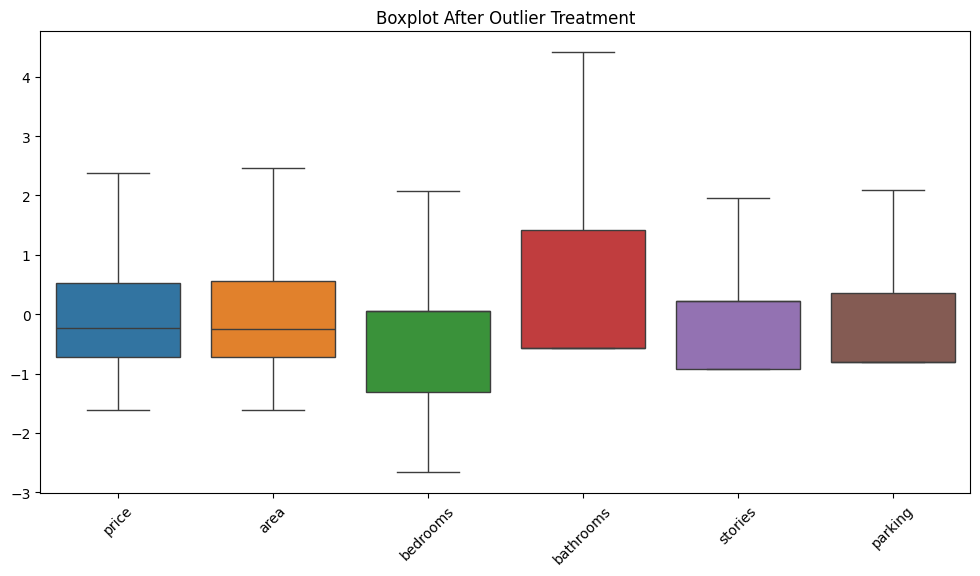

In [11]:
# Calculate lower and upper bounds for outlier treatment using IQR
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in num_features:
    df[col] = df[col].clip(lower_bound[col], upper_bound[col])

# Replot boxplot to confirm outliers are treated
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Treatment")
plt.show()

# Foundations of Statistics for ML

### Statistics and Probability are important for ML because
- Statistics help in understanding data, making inferences and building models
- Probability is the foundation of predictive modeling and uncertainty quantification.


**Population:** the entire set of entities of interest
**Sample:** A subset of population used for analysis
A sample has to be less than 30

**Descriptive vs Inferential Statistics**
- Description: summarized data(eg. mean, median, mode, standard deviation)
- Inferential: Make predictions or inferences about the population from the sample()

**Random Variables**
Random Variables are variables whose possible values are outcomes of a random phenomenon

- **Discete**: Takes countable values(number of heads in coin tosses)
- **Continous**: Takes uncountable values eg height

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
dfcopy = df.copy()
dfcopy.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  2.375029  1.046726  1.403419   1.421812  1.378217         1          0   
1  2.375029  1.757010  1.403419   4.409809  1.955120         1          0   
2  2.375029  2.218232  0.047278   1.421812  0.224410         1          0   
3  2.375029  1.083624  1.403419   1.421812  0.224410         1          0   
4  2.375029  1.046726  1.403419  -0.570187  0.224410         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  1.517692         1   
1         0                0                1  2.098551         0   
2         1                0                0  1.517692         1   
3         1                0                1  2.098551         1   
4         1                0                1  1.517692         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0

In [14]:
dfcopy.describe()

price        area    bedrooms   bathrooms     stories    mainroad  \
count  545.000000  545.000000  545.000000  545.000000  545.000000  545.000000   
mean    -0.021052   -0.022273   -0.019907   -0.001828   -0.043400    0.858716   
std      0.933914    0.925123    0.945914    0.991899    0.897135    0.348635   
min     -1.614327   -1.614530   -2.665004   -0.570187   -0.929397    0.000000   
25%     -0.715317   -0.715145   -1.308863   -0.570187   -0.929397    1.000000   
50%     -0.228353   -0.253922    0.047278   -0.570187    0.224410    1.000000   
75%      0.520821    0.557830    0.047278    1.421812    0.224410    1.000000   
max      2.375029    2.467293    2.081490    4.409809    1.955120    1.000000   

        guestroom    basement  hotwaterheating  airconditioning     parking  \
count  545.000000  545.000000       545.000000       545.000000  545.000000   
mean     0.177982    0.350459         0.045872         0.315596   -0.012790   
std      0.382849    0.477552         0.209399         0.465180    0.969770   
min      0.000000    0.000000         0.000000         0.000000   -0.805741   
25%      0.000000    0.000000         0.000000         0.000000   -0.805741   
50%      0.000000    0.000000         0.000000         0.000000   -0.805741   
75%      0.000000    1.000000         0.000000         1.000000    0.355976   
max      1.000000    1.000000         1.000000         1.000000    2.098551   

         prefarea  furnishingstatus  
count  545.000000        545.000000  
mean     0.234862          1.069725  
std      0.424302          0.761373  
min      0.000000          0.000000  
25%      0.000000          0.000000  
50%      0.000000          1.000000  
75%      0.000000          2.000000  
max      1.000000          2.000000

In [15]:
mean_price = dfcopy['price'].mean()
median_price = dfcopy['price'].median()
mode_price = dfcopy['price'].mode()

print(f"Mean: {mean_price} \nMedian: {median_price}\nMode: {mode_price}")

Mean: -0.02105249842910751 
Median: -0.22835341939562379
Mode: 0   -0.677858
1   -0.303271
Name: price, dtype: float64


In [ ]:

var_price = dfcopy['price'].var()
std_price = dfcopy['price'].std()

print(f"Variance: {var_price} \nStandard Deviation: {std_price}")

Variance: 0.8721962028598792 
Standard Deviation: 0.9339144515745964


In [18]:
from scipy.stats import skew, kurtosis

print(f"Skewness: {skew(df['price'])}")
print(f"Kurtosis: {kurtosis(df['price'])}")

Skewness: 0.8044504537890707
Kurtosis: 0.08173969891511401
